In [2]:
# import libraries

import category_encoders as ce
from flaml import AutoML
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read data

df=pd.read_csv('preprocessed_2.csv')
pd.set_option('display.max_columns',None)
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Manufacturing_Country,Delivery_Month,Delivery_Year,Manufacturing_Country_lat,Manufacturing_Country_long,Country_lat,Country_long,distance
0,11312,127-KE-T01,Pre-PQ Process,SO-29010,DN-1193,Kenya,PMO - US,From RDC,N/A - From RDC,Truck,Pre-PQ Process,N/A - From RDC,23-Apr-09,23-Apr-09,23-Apr-09,ARV,Pediatric,SCMS from RDC,"Efavirenz 30mg/ml [Stocrin/Sustiva], oral solu...",Efavirenz,Stocrin/Sustiva,30mg/ml,Oral solution,180.0,3930.000,39.3,0.01,0.00,"MSD, Haarlem, NL",Yes,892.0,4983.0,Netherlands,4,2009,52.500170,5.748082,1.441968,38.431398,6432.353215
1,11966,127-KE-T01,Pre-PQ Process,SO-29010,DN-1193,Kenya,PMO - US,From RDC,N/A - From RDC,Truck,Pre-PQ Process,N/A - From RDC,23-Apr-09,23-Apr-09,23-Apr-09,ARV,Pediatric,SCMS from RDC,"Efavirenz 200mg, capsule, 90 Caps",Efavirenz,Generic,200mg,Capsule,90.0,170.000,1.7,0.01,0.00,"Aurobindo Unit III, India",No,892.0,4983.0,India,4,2009,22.351115,78.667743,1.441968,38.431398,4928.795915
2,12830,127-KE-T01,Pre-PQ Process,SO-21980,DN-1049,Kenya,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,15-Jan-09,15-Jan-09,15-Jan-09,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30.0,3770.000,37.7,0.01,0.00,"Aurobindo Unit III, India",Yes,892.0,4983.0,India,1,2009,22.351115,78.667743,1.441968,38.431398,4928.795915
3,82480,151-NG-T30,FPQ-9432,SO-42332,DN-2687,Nigeria,PMO - US,From RDC,N/A - From RDC,Air,3/1/12,N/A - From RDC,2-Aug-12,3-Jun-12,3-Jun-12,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30.0,41987.375,273700.0,3.91,0.13,"Strides, Bangalore, India.",Yes,6889.0,17090.0,India,6,2012,22.351115,78.667743,9.600036,7.999972,7625.047588
4,82487,151-NG-T30,FPQ-9432,SO-41682,DN-2729,Nigeria,PMO - US,From RDC,N/A - From RDC,Air,3/1/12,N/A - From RDC,2-Aug-12,9-Jul-12,9-Jul-12,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30.0,41987.375,190500.0,3.81,0.13,Hetero Unit III Hyderabad IN,Yes,4944.0,21347.0,India,7,2012,22.351115,78.667743,9.600036,7.999972,7625.047588


In [4]:
# splitting data 


X=df[['Country','Fulfill Via','Shipment Mode','Sub Classification','Line Item Quantity',
      'Weight (Kilograms)','Manufacturing_Country','distance','Delivery_Month','Delivery_Year']]
y=df['Freight Cost (USD)']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

X_test,X_valid,y_test,y_valid=train_test_split(X_test,y_test,test_size=0.5,random_state=2)


encoder=ce.PolynomialEncoder(drop_invariant=True)

X_train=encoder.fit_transform(X_train,y_train)
X_test=encoder.transform(X_test)
X_valid=encoder.transform(X_valid)



In [5]:
X_train

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Country_8,Country_9,Country_10,Country_11,Country_12,Country_13,Country_14,Country_15,Country_16,Country_17,Country_18,Country_19,Country_20,Country_21,Country_22,Country_23,Country_24,Country_25,Country_26,Country_27,Country_28,Country_29,Country_30,Country_31,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38,Country_39,Fulfill Via_0,Shipment Mode_0,Shipment Mode_1,Sub Classification_0,Sub Classification_1,Sub Classification_2,Line Item Quantity,Weight (Kilograms),Manufacturing_Country_0,Manufacturing_Country_1,Manufacturing_Country_2,Manufacturing_Country_3,Manufacturing_Country_4,Manufacturing_Country_5,Manufacturing_Country_6,Manufacturing_Country_7,Manufacturing_Country_8,Manufacturing_Country_9,Manufacturing_Country_10,Manufacturing_Country_11,Manufacturing_Country_12,Manufacturing_Country_13,distance,Delivery_Month,Delivery_Year
2963,-0.263982,0.324561,-0.356883,0.366938,-0.358873,0.336667,-0.304364,0.265908,-0.224892,0.184333,-0.146526,0.113001,-0.084562,0.061404,-0.043258,0.029558,-0.019582,0.012570,-0.007815,0.004701,-0.002735,0.001536,-0.000833,0.000435,-0.000218,0.000105,-0.000049,0.000022,-0.000009,0.000004,-0.000001,4.899818e-07,-1.635553e-07,5.071916e-08,-1.445035e-08,3.737407e-09,-8.591655e-10,1.908857e-10,-3.906672e-11,-1.151867e-11,-0.707107,-7.071068e-01,0.408248,-0.670820,0.5,-0.223607,1544.000,892.000,-0.418330,0.472270,-0.456256,0.393641,-0.307724,0.219002,-0.141859,0.083314,-0.044039,0.020706,-0.008499,0.002954,-0.000820,0.000158,5198.216634,3,2009
7549,-0.250783,0.275877,-0.249818,0.183469,-0.089718,-0.016833,0.121746,-0.212726,0.281115,-0.322582,0.337010,-0.327703,0.300196,-0.260966,0.216291,-0.171437,0.130217,-0.094907,0.066426,-0.044663,0.028849,-0.017897,0.010658,-0.006087,0.003331,-0.001743,0.000872,-0.000415,0.000188,-0.000081,0.000033,-1.244553e-05,4.424184e-06,-1.458172e-06,4.407154e-07,-1.207124e-07,2.933433e-08,-6.840120e-09,1.478394e-09,4.548619e-10,0.707107,-5.551115e-17,-0.816497,-0.670820,0.5,-0.223607,41987.375,8714.125,-0.358569,0.269869,-0.065179,-0.168703,0.351684,-0.438004,0.425576,-0.345159,0.239071,-0.141982,0.071638,-0.029959,0.009845,-0.002210,8088.343095,1,2011
4596,-0.237584,0.229689,-0.156480,0.042339,0.082817,-0.189052,0.252856,-0.261817,0.216242,-0.127615,0.014653,0.101701,-0.202949,0.276316,-0.316118,0.323321,-0.303815,0.266107,-0.219115,0.170514,-0.125831,0.088240,-0.058873,0.037391,-0.022604,0.012999,-0.007104,0.003684,-0.001808,0.000838,-0.000366,1.494141e-04,-5.686349e-05,2.001446e-05,-6.444816e-06,1.876744e-06,-4.838192e-07,1.187242e-07,-2.716237e-08,-8.695443e-09,-0.707107,-7.071068e-01,0.408248,-0.223607,-0.5,0.670820,619.000,107.000,-0.358569,0.269869,-0.065179,-0.168703,0.351684,-0.438004,0.425576,-0.345159,0.239071,-0.141982,0.071638,-0.029959,0.009845,-0.002210,14429.657155,3,2013
1583,-0.224385,0.185998,-0.076145,-0.061652,0.179073,-0.237234,0.218354,-0.130047,0.001138,0.128921,-0.222874,0.256334,-0.223200,0.134926,-0.014886,-0.109593,0.214719,-0.285204,0.315898,-0.310470,0.278281,-0.230801,0.178623,-0.129656,0.088533,-0.056962,0.034551,-0.019750,0.010627,-0.005372,0.002544,-1.123886e-03,4.608608e-04,-1.742163e-04,6.007339e-05,-1.868332e-05,5.130384e-06,-1.329017e-06,3.226819e-07,1.071168e-07,0.707107,-7.071068e-01,0.408248,-0.670820,0.5,-0.223607,400.000,1028.000,-0.358569,0.269869,-0.065179,-0.168703,0.351684,-0.438004,0.425576,-0.345159,0.239071,-0.141982,0.071638,-0.029959,0.009845,-0.002210,14476.131000,10,2010
567,-0.211185,0.144804,-0.008091,-0.133421,0.216918,-0.207025,0.109157,0.034717,-0.165242,0.230703,-0.207054,0.105253,0.035677,-0.165432,0.241283,-0.241640,0.170184,-0.050810,-0.083087,0.200105,-0.279132,0.312542,-0.304657,0.267304,-0.214690,0.159333,-0.109852,0.070558,-0.042264,0.023601,-0.012265,5.914402e-03,-2.634184e-03,1.076965e-03,-4.001064e-04,1.336155e-04,-3.926656e-05,1.077734e-05,-2.784993e-06,-9.548534e-07,-0.707107,-7.071068e-01,0.40

In [6]:
lin=LinearRegression()
lin.fit(X_train,y_train)
test_pred=lin.predict(X_test)

print('TRAIN SCORE = ',lin.score(X_train,y_train))
print('--------------------------------=---------------------------------')  
print('TEST SCORE = ',lin.score(X_test,y_test))
print('-----------------------------------------------------------------') 
print('TEST MAE = ', metrics.mean_absolute_error(y_test, test_pred))
print('-----------------------------------------------------------------') 
print('TEST MSE = ', metrics.mean_squared_error(y_test, test_pred))
print('-----------------------------------------------------------------')   
print('TEST RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

TRAIN SCORE =  0.5579395513146748
--------------------------------=---------------------------------
TEST SCORE =  0.5131176808483595
-----------------------------------------------------------------
TEST MAE =  4538.647124868154
-----------------------------------------------------------------
TEST MSE =  37375386.538990855
-----------------------------------------------------------------
TEST RMSE =  6113.54124374661


In [8]:
## automl for selecting the best model

automl=AutoML()
automl_settings={"time_budget": 100,
            "metric": 'rmse',
            "task": 'regression',
            "log_file_name": 'freight.log'}

automl.fit(X_train=X_train,y_train=y_train,X_val=X_valid,y_val=y_valid,
           **automl_settings,n_jobs=-1,log_training_metric=True)

[flaml.automl: 11-17 16:17:43] {1432} INFO - Evaluation method: holdout
[flaml.automl: 11-17 16:17:43] {1478} INFO - Minimizing error metric: rmse
[flaml.automl: 11-17 16:17:43] {1515} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree']
[flaml.automl: 11-17 16:17:43] {1748} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-17 16:17:43] {1865} INFO - Estimated sufficient time budget=713s. Estimated necessary time budget=2s.
[flaml.automl: 11-17 16:17:43] {1938} INFO -  at 0.2s,	estimator lgbm's best error=7513.1252,	best estimator lgbm's best error=7513.1252
[flaml.automl: 11-17 16:17:43] {1748} INFO - iteration 1, current learner lgbm
[flaml.automl: 11-17 16:17:43] {1938} INFO -  at 0.2s,	estimator lgbm's best error=7513.1252,	best estimator lgbm's best error=7513.1252
[flaml.automl: 11-17 16:17:43] {1748} INFO - iteration 2, current learner lgbm
[flaml.automl: 11-17 16:17:43] {1938} INFO -  at 0.3s,	estimator lgbm's best error=6468.45

[flaml.automl: 11-17 16:17:46] {1938} INFO -  at 3.0s,	estimator xgboost's best error=6548.6674,	best estimator extra_tree's best error=3638.3394
[flaml.automl: 11-17 16:17:46] {1748} INFO - iteration 36, current learner extra_tree
[flaml.automl: 11-17 16:17:46] {1938} INFO -  at 3.1s,	estimator extra_tree's best error=3638.3394,	best estimator extra_tree's best error=3638.3394
[flaml.automl: 11-17 16:17:46] {1748} INFO - iteration 37, current learner extra_tree
[flaml.automl: 11-17 16:17:46] {1938} INFO -  at 3.2s,	estimator extra_tree's best error=3638.3394,	best estimator extra_tree's best error=3638.3394
[flaml.automl: 11-17 16:17:46] {1748} INFO - iteration 38, current learner extra_tree
[flaml.automl: 11-17 16:17:46] {1938} INFO -  at 3.4s,	estimator extra_tree's best error=3638.3394,	best estimator extra_tree's best error=3638.3394
[flaml.automl: 11-17 16:17:46] {1748} INFO - iteration 39, current learner rf
[flaml.automl: 11-17 16:17:47] {1938} INFO -  at 3.5s,	estimator rf's b

[flaml.automl: 11-17 16:17:55] {1938} INFO -  at 12.4s,	estimator extra_tree's best error=3337.4340,	best estimator extra_tree's best error=3337.4340
[flaml.automl: 11-17 16:17:55] {1748} INFO - iteration 72, current learner extra_tree
[flaml.automl: 11-17 16:17:56] {1938} INFO -  at 12.6s,	estimator extra_tree's best error=3337.4340,	best estimator extra_tree's best error=3337.4340
[flaml.automl: 11-17 16:17:56] {1748} INFO - iteration 73, current learner extra_tree
[flaml.automl: 11-17 16:17:56] {1938} INFO -  at 13.0s,	estimator extra_tree's best error=3315.5472,	best estimator extra_tree's best error=3315.5472
[flaml.automl: 11-17 16:17:56] {1748} INFO - iteration 74, current learner extra_tree
[flaml.automl: 11-17 16:17:56] {1938} INFO -  at 13.2s,	estimator extra_tree's best error=3315.5472,	best estimator extra_tree's best error=3315.5472
[flaml.automl: 11-17 16:17:56] {1748} INFO - iteration 75, current learner extra_tree
[flaml.automl: 11-17 16:17:57] {1938} INFO -  at 13.5s,	

[flaml.automl: 11-17 16:18:16] {1748} INFO - iteration 107, current learner extra_tree
[flaml.automl: 11-17 16:18:16] {1938} INFO -  at 33.2s,	estimator extra_tree's best error=3271.8812,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:18:16] {1748} INFO - iteration 108, current learner lgbm
[flaml.automl: 11-17 16:18:17] {1938} INFO -  at 34.1s,	estimator lgbm's best error=3428.1407,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:18:17] {1748} INFO - iteration 109, current learner extra_tree
[flaml.automl: 11-17 16:18:18] {1938} INFO -  at 35.1s,	estimator extra_tree's best error=3271.8812,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:18:18] {1748} INFO - iteration 110, current learner extra_tree
[flaml.automl: 11-17 16:18:18] {1938} INFO -  at 35.3s,	estimator extra_tree's best error=3271.8812,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:18:18] {1748} INFO - iteration 111, curr

[flaml.automl: 11-17 16:18:45] {1938} INFO -  at 62.0s,	estimator xgboost's best error=5800.2608,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:18:45] {1748} INFO - iteration 143, current learner xgboost
[flaml.automl: 11-17 16:18:45] {1938} INFO -  at 62.1s,	estimator xgboost's best error=5800.2608,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:18:45] {1748} INFO - iteration 144, current learner xgboost
[flaml.automl: 11-17 16:18:45] {1938} INFO -  at 62.1s,	estimator xgboost's best error=5767.8276,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:18:45] {1748} INFO - iteration 145, current learner xgboost
[flaml.automl: 11-17 16:18:45] {1938} INFO -  at 62.2s,	estimator xgboost's best error=5767.8276,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:18:45] {1748} INFO - iteration 146, current learner rf
[flaml.automl: 11-17 16:18:46] {1938} INFO -  at 62.6s,	estimator rf's best error

[flaml.automl: 11-17 16:19:04] {1748} INFO - iteration 178, current learner xgboost
[flaml.automl: 11-17 16:19:04] {1938} INFO -  at 81.4s,	estimator xgboost's best error=5572.8737,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:19:04] {1748} INFO - iteration 179, current learner xgboost
[flaml.automl: 11-17 16:19:04] {1938} INFO -  at 81.5s,	estimator xgboost's best error=5572.8737,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:19:04] {1748} INFO - iteration 180, current learner extra_tree
[flaml.automl: 11-17 16:19:06] {1938} INFO -  at 83.2s,	estimator extra_tree's best error=3271.8812,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:19:06] {1748} INFO - iteration 181, current learner extra_tree
[flaml.automl: 11-17 16:19:07] {1938} INFO -  at 83.9s,	estimator extra_tree's best error=3271.8812,	best estimator extra_tree's best error=3271.8812
[flaml.automl: 11-17 16:19:07] {1748} INFO - iteration 182, curr

In [7]:
class Model:
    
    def __init__(self,model):
        self.model=model
        
    def train(self):
        result=self.model.fit(X_train,y_train)
        prediction=result.predict(X_valid)
        print('TRAIN SCORE = ',result.score(X_train,y_train))
        print('--------------------------------=---------------------------------')  
        print('VALID SCORE = ',result.score(X_valid,y_valid))
        print('-----------------------------------------------------------------') 
        print('VALID MAE =',metrics.mean_absolute_error(y_valid,prediction))
        print('-----------------------------------------------------------------')
        print('VALID MSE = ',metrics.mean_squared_error(y_valid,prediction))
        print('-----------------------------------------------------------------')
        print('VALID RMSE = ',np.sqrt(metrics.mean_squared_error(y_valid, prediction)))
        print('-----------------------------------------------------------------') 
        plot_model(y_valid,prediction)
        
    def features(self):
        feat_imp = pd.Series(self.model.feature_importances_, index=X_train.columns)
        features = feat_imp.nlargest(20)
        features.plot(kind='barh')
        plt.title('IMPORTANT FEATURES')
        plt.show()
        
        
    def test(self):  
        test_pred=self.model.predict(X_test)
        print('TEST SCORE = ',self.model.score(X_test,y_test))
        print('-----------------------------------------------------------------') 
        print('TEST MAE = ', metrics.mean_absolute_error(y_test, test_pred))
        print('-----------------------------------------------------------------') 
        print('TEST MSE = ', metrics.mean_squared_error(y_test, test_pred))
        print('-----------------------------------------------------------------')   
        print('TEST RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
        print('-----------------------------------------------------------------') 
        plot_model(y_test,test_pred)
        
        
        return pd.DataFrame({'ACTUAL':y_test,'PREDICTED':test_pred})
    
    def save_model(self):
        pickle.dump(self.model,open('model.pkl','wb'))


def plot_model(y,prediction):
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    plt.title('RESIDUAL PLOT')
    sns.histplot(y-prediction,kde=True,color='green')
    
    plt.subplot(1,2,2)
    plt.title('REGRESSION PLOT')
    sns.regplot(x=y,y=prediction,scatter_kws={'color':'black'},line_kws={'color':'red'})

TRAIN SCORE =  0.9885663173412564
--------------------------------=---------------------------------
VALID SCORE =  0.8652408829599467
-----------------------------------------------------------------
VALID MAE = 1672.9678215076474
-----------------------------------------------------------------
VALID MSE =  10666316.277320296
-----------------------------------------------------------------
VALID RMSE =  3265.932681076004
-----------------------------------------------------------------


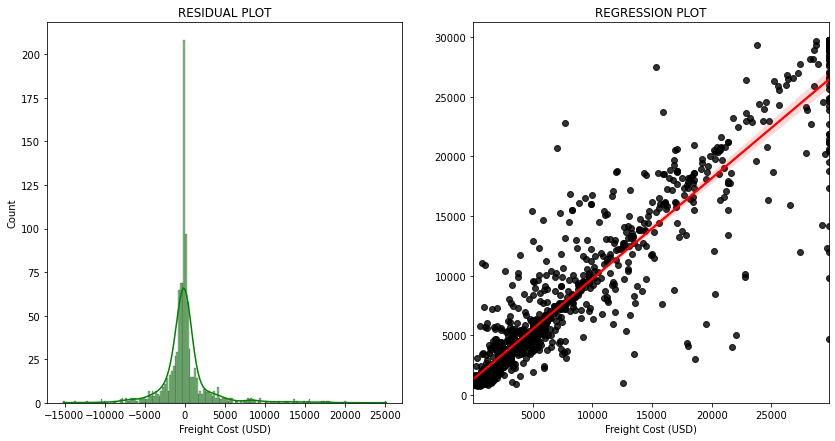

In [8]:
et=ExtraTreesRegressor(max_features=1.0, max_leaf_nodes=2131, n_estimators=67,
                    n_jobs=-1)

t=Model(et)
t.train()


TEST SCORE =  0.8501766443465156
-----------------------------------------------------------------
TEST MAE =  1750.7625792302988
-----------------------------------------------------------------
TEST MSE =  11501148.449741999
-----------------------------------------------------------------
TEST RMSE =  3391.3343170118155
-----------------------------------------------------------------


,ACTUAL,PREDICTED
3131,21397.0,21335.890547
594,25732.0,20697.875586
3234,29797.5,21656.305008
5387,1763.0,3926.017681
8888,2008.0,3829.794843
...,...,...
5902,8654.0,8570.406570
2834,1363.0,3405.204251
9159,2465.0,2464.899895
207,29674.0,23481.405721


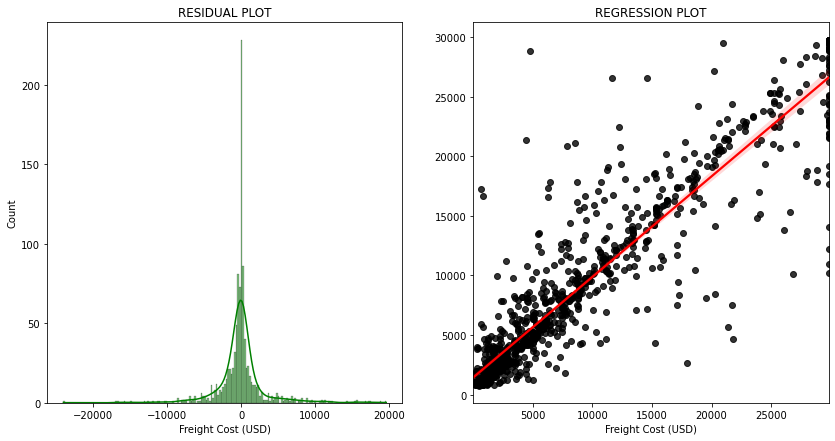

In [9]:
t.test()


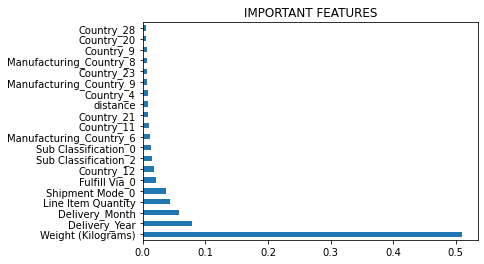

In [10]:
t.features()

In [15]:
t.save_model()
pickle.dump(encoder,open('encoder.pkl','wb'))